# Лабораторная работа 3

Датасет - **Цены на золото**	https://www.kaggle.com/datasets/sid321axn/gold-price-prediction-dataset


**Бизнес-цели**: 
1. Прогнозирование цены золота на момент закрытия для поддержки принятия решений по инвестициям.
2. Оценка волатильности цен золота для долгосрочных стратегий инвестирования.

**Цели технического проекта**: 
1. Создание модели машинного обучения для прогнозирования цены закрытия акций на золото на основе исторических данных (дат, цен открытия, максимальных и минимальных цен, объёма торгов).
2. Разработка системы, которая вычисляет и анализирует волатильность на основе исторической ценовой информации и объёмов торгов.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

df = pd.read_csv("data/Gold.csv")
print(df)

# Преобразование даты продажи в числовой формат (кол-во дней с 01.01.1970)
df['Date'] = pd.to_datetime(df['Date'])
df['Date_numeric'] = (df['Date'] - pd.Timestamp('1970-01-01')).dt.days
print(df['Date_numeric'])

            Date        Open        High         Low       Close   Adj Close  \
0     2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
1     2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2     2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
3     2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
4     2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   
...          ...         ...         ...         ...         ...         ...   
1713  2018-12-24  119.570000  120.139999  119.570000  120.019997  120.019997   
1714  2018-12-26  120.620003  121.000000  119.570000  119.660004  119.660004   
1715  2018-12-27  120.570000  120.900002  120.139999  120.570000  120.570000   
1716  2018-12-28  120.800003  121.080002  120.720001  121.059998  121.059998   
1717  2018-12-31  120.980003  121.260002  120.830002  121.250000  121.250000   

        Volume     SP_open     SP_high 

In [14]:
# Функция для разбиения на обучающую, валидационную, тестовую выборки
def split_stratified_into_train_val_test(
    df_input,
    stratify_colname="y",
    frac_train=0.6,
    frac_val=0.15,
    frac_test=0.25,
    random_state=None,
):
    #проверка, что сумма долей выборок равна 1
    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError(
            "fractions %f, %f, %f do not add up to 1.0"
            % (frac_train, frac_val, frac_test)
        )

    #проверка наличия указанного столбца для стратификации
    if stratify_colname not in df_input.columns:
        raise ValueError("%s is not a column in the dataframe" % (stratify_colname))

    #разделение на признаки х и целевую переменную у
    X = df_input 
    y = df_input[
        [stratify_colname]
    ]  

    #разделение данных на обучающую и временную выборку с учетом стратификации
    df_train, df_temp, y_train, y_temp = train_test_split(
        X, y, stratify=y, test_size=(1.0 - frac_train), random_state=random_state
    )

    #вычисление относительной доли тестовой выборки по отношению к временной
    relative_frac_test = frac_test / (frac_val + frac_test)
    #разделение временной выборки на валидационную и тестовую
    df_val, df_test, y_val, y_test = train_test_split(
        df_temp,
        y_temp,
        stratify=y_temp,
        test_size=relative_frac_test,
        random_state=random_state,
    )
    #проверка что общее кол-во данных равно сумме трех выборок
    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)

    return df_train, df_val, df_test

#создаем бины (интервалы) для столбца Close и присваиваем метки в новый столбец
bins = [df['Close'].min(), df['Close'].quantile(0.33), df['Close'].quantile(0.66), df['Close'].max()]
labels = ['Low', 'Medium', 'High']
df['Close_binned'] = pd.cut(df['Close'], bins=bins, labels=labels)
#удаляем строки с пропущенными значениями
df = df.dropna()
# вызываем ф-ию для разделения данных на выборки с стратификацией по новому столбцу Close_binned
df_train, df_val, df_test = split_stratified_into_train_val_test(
    df, stratify_colname="Close_binned", frac_train=0.60, frac_val=0.20, frac_test=0.20
)

print(df_train.columns) 
   
print("Обучающая выборка: ", df_train.shape)
print(df_train.Close.value_counts()) 

print("Контрольная выборка: ", df_val.shape)
print(df_val.Close.value_counts())

print("Тестовая выборка: ", df_test.shape)
print(df_test.Close.value_counts())

print("Обучающая выборка: ", df_train.shape)
print(df_train['Close_binned'].value_counts())

print("Контрольная выборка: ", df_val.shape)
print(df_val['Close_binned'].value_counts())

print("Тестовая выборка: ", df_test.shape)
print(df_test['Close_binned'].value_counts())


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

In [15]:
#уменьшаем дисбаланс и количество уникальных значений в столбце Close
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(df_train, df_train["Close_binned"])
# Создание датафрейма для результирующей выборки
df_train_rus = pd.DataFrame(X_resampled)
print("Обучающая выборка после undersampling: ", df_train_rus.shape)
print(df_train_rus.Close.value_counts())

Обучающая выборка после undersampling:  (1020, 83)
Close
124.589996    4
125.540001    3
122.209999    3
121.110001    3
121.580002    3
             ..
126.989998    1
156.279999    1
157.929993    1
127.150002    1
149.460007    1
Name: count, Length: 892, dtype: int64


In [16]:
df_train = pd.get_dummies(df_train, columns=['Close_binned'])
df_train['Volume_binned'] = pd.qcut(df_train['Volume'], q=4, labels=False)
#Создание нового столбца 'Price_change', который показывает изменение цены (разница между закрытием и открытием).
df_train['Price_change'] = df_train['Close'] - df_train['Open']
print(df_train) 

           Date        Open        High         Low       Close   Adj Close  \
1540 2018-04-16  127.739998  128.050003  127.570000  127.629997  127.629997   
568  2014-05-16  124.349998  124.769997  124.290001  124.500000  124.500000   
972  2015-12-30  101.470001  101.599998  101.349998  101.419998  101.419998   
1087 2016-06-16  125.169998  125.669998  122.230003  122.379997  122.379997   
401  2013-08-22  132.559998  133.460007  132.270004  132.809998  132.809998   
...         ...         ...         ...         ...         ...         ...   
524  2014-03-12  131.559998  132.119995  131.389999  131.759995  131.759995   
1409 2017-10-04  121.209999  121.269997  120.709999  121.169998  121.169998   
672  2014-10-17  119.059998  119.230003  118.419998  118.989998  118.989998   
1333 2017-06-14  121.510002  121.879997  119.570000  119.820000  119.820000   
1695 2018-11-27  115.550003  115.629997  114.599998  114.949997  114.949997   

        Volume     SP_open     SP_high      SP_low 

In [17]:
from sklearn.preprocessing import StandardScaler
# Нормализация значений для указанных столбцов
# чтобы значения разных столбов в среднем были 0, а стандартное отклонение - 1
scaler = StandardScaler()
df_train[['Open', 'Close', 'High', 'Low', 'Volume']] = scaler.fit_transform(
    df_train[['Open', 'Close', 'High', 'Low', 'Volume']])
#Создание нового столбца 'Volatility', который показывает волатильность (разницу между максимальной и минимальной ценой).
df_train['Volatility'] = df_train['High'] - df_train['Low']
print(df_train) 

           Date      Open      High       Low     Close   Adj Close    Volume  \
1540 2018-04-16  0.043550  0.030843  0.067156  0.038908  127.629997 -0.713195   
568  2014-05-16 -0.154408 -0.159690 -0.126032 -0.143968  124.500000 -0.814939   
972  2015-12-30 -1.490481 -1.505617 -1.477167 -1.492459  101.419998 -0.871967   
1087 2016-06-16 -0.106524 -0.107409 -0.247363 -0.267833  122.379997  3.378675   
401  2013-08-22  0.325013  0.345106  0.343980  0.341559  132.809998 -0.501164   
...         ...       ...       ...       ...       ...         ...       ...   
524  2014-03-12  0.266619  0.267266  0.292149  0.280211  131.759995  0.492769   
1409 2017-10-04 -0.337768 -0.363002 -0.336889 -0.338529  121.169998 -0.364973   
672  2014-10-17 -0.463316 -0.481504 -0.471767 -0.465900  118.989998 -0.070863   
1333 2017-06-14 -0.320249 -0.327568 -0.404033 -0.417405  119.820000  2.355439   
1695 2018-11-27 -0.668282 -0.690625 -0.696760 -0.701944  114.949997  0.228502   

         SP_open     SP_hig

In [18]:
#генерация новых признаков из данных с помощью featuretools
import featuretools as ft
# Создание EntitySet для объединения разных датасетов для удобного использования
es = ft.EntitySet(id="stocks")
es = es.add_dataframe(
    dataframe_name="stock_data", 
    dataframe=df_train,                            
    index="Date")
# Генерация признаков
feature_matrix, feature_defs = ft.dfs(
    entityset=es, 
    target_dataframe_name="stock_data")

feature_defs

d:\3 kurs\МИИ\1 лаб\mai-main\.venv\Lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(


[<Feature: Open>,
 <Feature: High>,
 <Feature: Low>,
 <Feature: Close>,
 <Feature: Adj Close>,
 <Feature: Volume>,
 <Feature: SP_open>,
 <Feature: SP_high>,
 <Feature: SP_low>,
 <Feature: SP_close>,
 <Feature: SP_Ajclose>,
 <Feature: SP_volume>,
 <Feature: DJ_open>,
 <Feature: DJ_high>,
 <Feature: DJ_low>,
 <Feature: DJ_close>,
 <Feature: DJ_Ajclose>,
 <Feature: DJ_volume>,
 <Feature: EG_open>,
 <Feature: EG_high>,
 <Feature: EG_low>,
 <Feature: EG_close>,
 <Feature: EG_Ajclose>,
 <Feature: EG_volume>,
 <Feature: EU_Price>,
 <Feature: EU_open>,
 <Feature: EU_high>,
 <Feature: EU_low>,
 <Feature: EU_Trend>,
 <Feature: OF_Price>,
 <Feature: OF_Open>,
 <Feature: OF_High>,
 <Feature: OF_Low>,
 <Feature: OF_Volume>,
 <Feature: OF_Trend>,
 <Feature: OS_Price>,
 <Feature: OS_Open>,
 <Feature: OS_High>,
 <Feature: OS_Low>,
 <Feature: OS_Trend>,
 <Feature: SF_Price>,
 <Feature: SF_Open>,
 <Feature: SF_High>,
 <Feature: SF_Low>,
 <Feature: SF_Volume>,
 <Feature: SF_Trend>,
 <Feature: USB_Price>,

In [19]:
# Оценка предсказательной способности
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Копирование датафрейма для регрессионного анализа
df_train_regression = df_train.copy()
# Определение признаков и целевой переменной
X_train = df_train_regression.drop(['Close', 'Date'], axis=1)
y_train = df_train_regression['Close']
X_test = df_test.drop(['Close', 'Date'], axis=1)
y_test = df_test['Close']
# Преобразование категориальных признаков в дамми-переменные
# (создание столбцов со значениями 0 или 1, если это булевой столбец)
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)
# Устранение различий в количестве столбцов между обучающей и тестовой выборками
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
# Проверка типов данных
print(X_train_encoded.dtypes)

Open                   float64
High                   float64
Low                    float64
Adj Close              float64
Volume                 float64
                        ...   
Close_binned_Medium       bool
Close_binned_High         bool
Volume_binned            int64
Price_change           float64
Volatility             float64
Length: 86, dtype: object


In [20]:
# Обучение модели линейной регрессии (поиск зависимостей между признаками)
model = LinearRegression()
model.fit(X_train_encoded, y_train)
# Предсказание цены на тестовой выборке
predictions = model.predict(X_test_encoded)
# Оценка качества модели
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print("Средняя абсолютная ошибка:", mae)
print("Среднеквадратичная ошибка:", mse)

Средняя абсолютная ошибка: 127.64575343475643
Среднеквадратичная ошибка: 16571.79812749788


In [21]:
# Оценка скорости вычисления
import time
start_time = time.time()
model.fit(X_train_encoded, y_train)
training_time = time.time() - start_time

start_time = time.time()
predictions = model.predict(X_test_encoded)
prediction_time = time.time() - start_time

print(f'время, затраченное на обучение модели: {training_time}. Время, затраченное на предсказание: {prediction_time}')

время, затраченное на обучение модели: 0.18988895416259766. Время, затраченное на предсказание: 0.002999544143676758


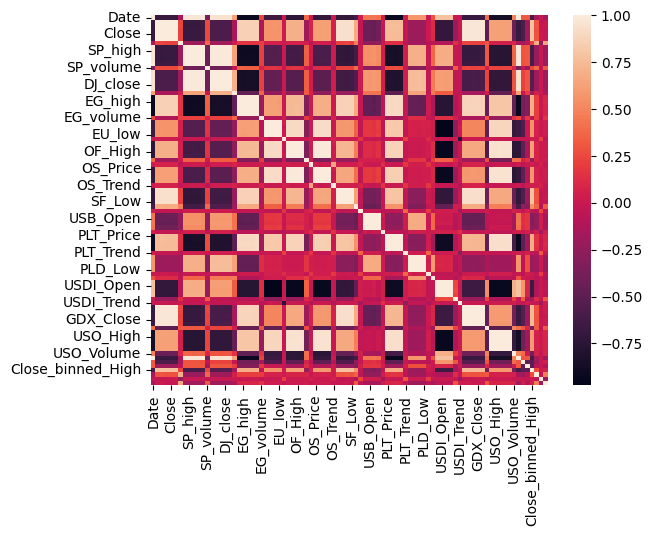

In [22]:
# Оценка корреляции
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_train_regression.corr()
sns.heatmap(corr_matrix, annot=False)
plt.show()